In [83]:
from selenium.webdriver.common.keys import Keys            
from selenium.webdriver.support.ui import Select                
from selenium.webdriver.support.ui import WebDriverWait    
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.by import By                      
from selenium import webdriver                             
import time                                                
from bs4 import BeautifulSoup                                 
import matplotlib.pyplot as plt                              
import re                                                    
import pandas as pd                                    
import numpy as np                                              
from selenium.common.exceptions import NoSuchElementException 
import operator

In [257]:
driver=webdriver.Chrome(executable_path="C:\\Users\\Arijit\\Desktop\\coding ninja notes\\chromedriver.exe")
driver.get('https://www.instagram.com/')

In [81]:
username=driver.find_element_by_name('username')
pass_=driver.find_element_by_name('password')
username.send_keys('arijitps')
pass_.send_keys('ajinsta')
btn=driver.find_element_by_xpath("//button[contains(@class,'L3NKy')]")
btn.submit()

In [82]:
verify=driver.find_element_by_name('verificationCode')
verify.send_keys('074066')
btn=driver.find_element_by_xpath("//button[contains(@class,'L3NKy')]")
btn.submit()
WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'cmbtv'))).click()##decline saving info
WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[@class = "mt3GC"]//button[2]'))).click()##decline notification
print('Succesfully Logged in')

Succesfully Logged in


### 1

#### 1.1

In [236]:
search=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
search.send_keys('food')
time.sleep(3)
count=0
usernames=[]
wait=WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.XPATH,"//div[contains(@class,'fuqBx')]/div")))
foodli=driver.find_elements_by_xpath("//div[contains(@class,'fuqBx')]/div")
for i in foodli:
    data=BeautifulSoup(i.get_attribute('innerHTML'),'html.parser')
    x=data.a['href'].split('/')
    if x[1]!='explore':
        count+=1
        usernames.append(x[1])
    if count==10:
        driver.find_element_by_xpath('//div[contains(@class,"coreSpriteSearchClear")]').click()
        break
        

In [238]:
topfollowers={}
top5=[]
for i in usernames:
    driver.get('https://www.instagram.com/' +str(i)+'/') 
    time.sleep(3)
    num=driver.find_elements_by_class_name('g47SY ')[1].get_attribute('innerHTML')
    num=num.replace(',','')
    if num[-1]=='k':
        num=float(num[:len(num)-1])*1000
    elif num[-1]=='m':
        num=float(num[:len(num)-1])*1000000
    topfollowers[i]=int(num)

sorted_d = dict( sorted(topfollowers.items(), key=operator.itemgetter(1),reverse=True))
count=0
for i in sorted_d:
    count+=1
    top5.append(i)
    print(i,sorted_d[i])
    if count==5:
        break

foodhunter_sabu 393000
foodie_sha_ 194000
food 149000
foodaholic_malluboy 136000
foodie_muscle_man 101000


#### 1.2

In [240]:
last3dayspost={}
for i in top5:
    count=0
    driver.get('https://www.instagram.com/' +str(i)+'/') 
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"eLAPa")]'))).click()
    while True:
        duration=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//a[@class="c-Yi7"]/time'))).get_attribute('innerHTML')
        duration=duration.split()
        if duration[1]=='minutes' or duration[1]=='minute'or duration[1]=='hours'or duration[1]=='hour'or duration[1]=='day':
            count+=1
        elif duration[1]=='days':
            if int(duration[0])<3:
                count+=1
            else:
                break
        else:
            break
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'l8mY4'))).click()
    last3dayspost[i]=count
for i in last3dayspost:
    print(i,last3dayspost[i])

foodhunter_sabu 0
foodie_sha_ 0
food 1
foodaholic_malluboy 0
foodie_muscle_man 1


#### 1.3

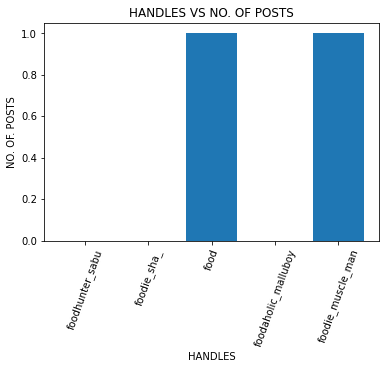

In [241]:
plt.bar(last3dayspost.keys(), last3dayspost.values()) # values of x y axis 
plt.xticks(rotation = 70) # rotate handles name
plt.xlabel('Handles'.upper() , size = 10)
plt.ylabel('No. of. posts'.upper() , size = 10)
plt.title('Handles vs No. of Posts'.upper() )
plt.show()

### 2

#### 2.1

In [243]:
content=[]
for i in top5:
    count=0
    driver.get('https://www.instagram.com/' +str(i)+'/') 
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"eLAPa")]'))).click()
    while True:
        count+=1
        text=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'C4VMK'))).text
        content.append(text)
        print(i,'\'s Post No: ',count)
        print(text)
        print('\n\n')
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'l8mY4'))).click()
        if count==10:
            break

foodhunter_sabu 's Post No:  1
foodhunter_sabu
It’s not easy to work at these extreme conditions, still We found our brave soldiers smiling to Us, Thank you for guarding our Mother Nation

#proudindian #bravesoldiers #bluesquadarmy #bluereelarmy #indiavspak #foodhunter_sabu
1w



foodhunter_sabu 's Post No:  2
foodhunter_sabu
Pastelon from Latin America @roastown_global

#foodiesofindia #travelfoodie #riderslifestyle #thrissur #foodhunter_sabu #keralagram
1w



foodhunter_sabu 's Post No:  3
foodhunter_sabu
Panzarotti from @roastown_global
#foodiesofinstagram #travellerlife #thrissur #foodhunter_sabu #indianfoodie #thrissur
2w



foodhunter_sabu 's Post No:  4
foodhunter_sabu
Explore unexplored 😻
#riders #traveller #africatwin #biker #exploreindia
2w



foodhunter_sabu 's Post No:  5
foodhunter_sabu
Chicken Lollipop using @mattees5star Broast Powder
#foodiesofindia #travellerlife #ridersofkerala #matteesfivestar #foodhunter_sabu #malayalis #mallu #keralatourism #homecooking #malappuram

food 's Post No:  7
food
Pumpkin Season has gone next level! Introducing The Pumpkin Bagel 🎃🥯 #pumpkinseason #fall #fallfood #foodfaves #bagellover

📸 @the_bagel_nook
1w



food 's Post No:  8
food
@stephmhernandez shares a recap from our @food✖️@citizensxsbe “Food Crawl” private tasting event

ICYMI here were some of the highlights…
@umamiburger 🍔
@krispyrice 🍣
@elpolloverdedg 🐓🥗
@cindylouscookies 🍪
@soomsoomfresh 🥙
@plantnationbysbe 🌿
@samscrispychicken 🐔
@katsuyabysbe 🍱

Have food FOMO? Follow and tag @food 😋

#foodcollabs
1w



food 's Post No:  9
food
PSA: Food is better with friends
🍔 @umamiburger
📸 @tinaxzw
_

#food #foodfaves #burgers #burgerlover #burgertime #umamiburger #newyorkcity #nycfoodie
2w



food 's Post No:  10
food
🍕LAST CHANCE TO WIN🍔
Still hungry?? 😋 In the New York City area Wednesday October 20th from 6-9? Want an exclusive sneak peak at @citizensxsbe ? Are you ready for the most epic private tasting experience of your life? 🙋🏽‍♀️ 🙋🏼‍♀️🙋🏽‍♂️ 🙋🏻‍♂️ We’re giving a

foodie_muscle_man 's Post No:  6
foodie_muscle_man
@wytehousecalicut ലെ ഇടിച്ചിക്കനും കൂട്ടി നൂൽ പൊറോട്ട കഴിച്ചാൽ എന്ത് സംഭവിക്കും എന്നറിയാൻ വീഡിയോ മുഴുവൻ കാണുക 😳😡😳
.
#food #foods #porotta #chicken #chic #grilledchicken #grill #foodpic #foodbloggers #foodporn #foodie #foodblogger #foodphotography #foodpictures #instafood #instagram #instagrammers #instagood #instamood #instadaily #foryou #youtube #facebook #uae #dubai🇦🇪 #karnataka #Bangalore #kochi #instalike #foodlovers
1w



foodie_muscle_man 's Post No:  7
foodie_muscle_man
2200രൂപയുടെ dinner buffet കഴിക്കാൻ ഞാനും @ikku_bhais_manthi_irinjalakuda ടീംസും പോയപ്പോൾ ഞങ്ങൾക്ക് സംഭവിച്ചത് 😳😳.
.
#dinner #buffet #kochi #ernakulam #foodporn #foodie #foodblogger #foodpics #foodphotography #foodpic #foodlover #foodstyling #foodlovers #foodie_muscle_man #insta #instadaily #instafood #instalike #instagram #instagramers #foryou #youtube #dubai #uae #qatar #india #karnataka #bangalore #kasargod #uae🇦🇪
1w



foodie_muscle_man 's Post No:  8
foodie_m

#### 2.2

In [256]:
import re
cleaneddata=[]
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
for i in content:
    cleaneddata.append(remove_emojis(i))

unwantedchar= "[-/\"/=/+/“/”/*/-/@/,/?/)/(/|/0-9/./:/!/>/<]"
worddict={}
hashtags={}
for i in cleaneddata:
    words=i.split()
    for word in words:
        word=re.sub(unwantedchar, "", word)
        if word!='':
            if word[0]=='#':
                hashtags[word]=hashtags.get(word,0)+1
            else:
                worddict[word]=worddict.get(word,0)+1
df=pd.DataFrame(worddict.items(),columns=['Word','Freq'])
df=df.sort_values(by='Freq', ascending=False)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.to_csv('wordfreq',index=False)
df

,Word,Freq
0,w,40
1,to,18
2,food,18
3,the,12
4,a,11
...,...,...
541,Qabuli,1
542,such,1
543,dishes,1
544,afghani,1


#### 2.3

In [249]:
hashtags_sorted = dict( sorted(hashtags.items(), key=operator.itemgetter(1),reverse=True))
count=0
x=[]
y=[]
for i in hashtags_sorted:
    count+=1
    x.append(i)
    y.append(hashtags_sorted[i])
    print(i,hashtags_sorted[i])
    if count==5:
        break

#foodporn 25
#foodie 17
#food 17
#foodblogger 17
#instafood 16


#### 2.4

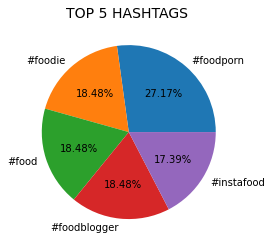

In [250]:
plt.pie(y , labels = x , autopct = "%.2f%%") 
plt.title("TOP 5 HASHTAGS " , size = 14)
plt.show()


## 3

#### 3.1

In [251]:
topfollowers# dict containing top followers and no of followers
averagelikes={}

for i in top5:
    count=0
    sumlikes=0
    driver.get('https://www.instagram.com/' +str(i)+'/') 
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"eLAPa")]'))).click()
    print('----------  ',i,'  ----------')
    while True:
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//a[@class="c-Yi7"]'))).get_attribute('innerHTML')
        try:
            driver.find_element_by_class_name('vcOH2')
            driver.find_element_by_class_name('vcOH2').click()
            like=driver.find_element_by_class_name('vJRqr').text
        except:
            like=driver.find_elements_by_class_name('zV_Nj')[-1].text
        like=like.replace(',','').split()[0]
        count+=1
        print('Likes for post ',count,': ',like)
        sumlikes+=int(like)
        
        if count==10:
            break
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'l8mY4'))).click()
    averagelikes[i]=sumlikes//10
    

----------   foodhunter_sabu   ----------
Likes for post  1 :  10665
Likes for post  2 :  8183
Likes for post  3 :  4102
Likes for post  4 :  8934
Likes for post  5 :  56746
Likes for post  6 :  19379
Likes for post  7 :  8346
Likes for post  8 :  106154
Likes for post  9 :  11538
Likes for post  10 :  54071
----------   foodie_sha_   ----------
Likes for post  1 :  13795
Likes for post  2 :  39816
Likes for post  3 :  9693
Likes for post  4 :  31233
Likes for post  5 :  12054
Likes for post  6 :  17428
Likes for post  7 :  30883
Likes for post  8 :  4911
Likes for post  9 :  43875
Likes for post  10 :  8252
----------   food   ----------
Likes for post  1 :  90
Likes for post  2 :  445
Likes for post  3 :  487
Likes for post  4 :  620
Likes for post  5 :  634
Likes for post  6 :  472
Likes for post  7 :  1136
Likes for post  8 :  174
Likes for post  9 :  630
Likes for post  10 :  166
----------   foodaholic_malluboy   ----------
Likes for post  1 :  13117
Likes for post  2 :  31651
Li

#### 3.2

In [252]:
for i in averagelikes:
    print(i,averagelikes[i])

foodhunter_sabu 28811
foodie_sha_ 21194
food 485
foodaholic_malluboy 38972
foodie_muscle_man 22808


#### 3.3

In [253]:
like_followers_ratio={}
for i in top5:
    ratio=averagelikes[i]/topfollowers[i]
    like_followers_ratio[i]=ratio
for i in like_followers_ratio:
    print(i,like_followers_ratio[i])

foodhunter_sabu 0.07331043256997455
foodie_sha_ 0.10924742268041238
food 0.0032550335570469798
foodaholic_malluboy 0.28655882352941175
foodie_muscle_man 0.22582178217821783


#### 3.4

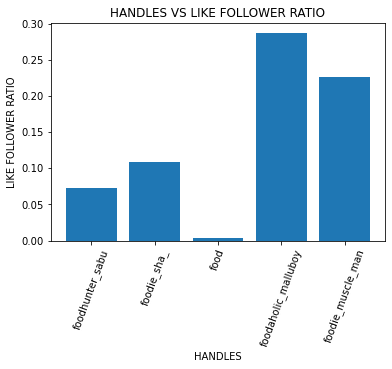

In [255]:
plt.bar(like_followers_ratio.keys(), like_followers_ratio.values()) # values of x y axis 
plt.xticks(rotation = 70) # rotate handles name
plt.xlabel('Handles'.upper() , size = 10)
plt.ylabel('Like Follower ratio'.upper() , size = 10)
plt.title('Handles vs Like Follower ratio'.upper() )
plt.show()